# 1. Import Library

In [193]:
import pandas as pd
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [194]:
df = pd.read_csv("ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


Notes:
* experience_level:
    - SE = Senior
    - EN = Entry
    - MI = Mid
    - EX = Executive
* employment_type:
    - CT = Contract
    - FL = Full-Time
    - PT = Part-Time
    - FT = Freelance
* company_size:
    - M = Medium (50-250)
    - L = Large (>250)
    - S = Small (<50)
* remote_ratio:
    - 0 = No remote
    - 50 = Hybrid
    - 100 = Remote

In [195]:
summary = pd.DataFrame({
    'Features': df.columns,
    'Number of Cardinality': [df[col].nunique() for col in df.columns],
    'Cardinality': [df[col].unique()[:20]for col in df.columns]
})

print(summary)

                  Features  Number of Cardinality  \
0                   job_id                  15000   
1                job_title                     20   
2               salary_usd                  14315   
3          salary_currency                      3   
4         experience_level                      4   
5          employment_type                      4   
6         company_location                     20   
7             company_size                      3   
8       employee_residence                     20   
9             remote_ratio                      3   
10         required_skills                  13663   
11      education_required                      4   
12        years_experience                     20   
13                industry                     15   
14            posting_date                    486   
15    application_deadline                    543   
16  job_description_length                   2000   
17          benefits_score                    

## Checking Data Type of Each Features

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

The data type of each features is correct

## Checking Duplicates Data

In [197]:
df.duplicated().sum()

0

There is no duplicate data

# 3. Modifying Features

In [198]:
df['required_skills'] = df['required_skills'].str.split(", ")
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"[Deep Learning, AWS, Mathematics, Python, Docker]",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"[Scala, SQL, Linux, Python]",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"[MLOps, Java, Tableau, Python]",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"[Java, Kubernetes, Azure]",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"[Mathematics, Docker, SQL, Deep Learning]",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"[Scala, Spark, NLP]",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"[Java, Computer Vision, Python, TensorFlow]",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


# 4. Statistical Analysis

In [199]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


## Normality Check

In [200]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    print(f'{col}: {df[col].skew()}')

salary_usd: 1.2527592133197596
remote_ratio: 0.018981197240634334
years_experience: 0.7788132121793866
job_description_length: -0.01182202766151641
benefits_score: -0.009657871296079869


Features salary_usd is Positive Highly Skewed. Features remote_ratio, job_description_length, and benefits_score are aprroximately symetric, and Features years_experience is moderately skewed

In [201]:
for col in numeric_cols:
    print(f'{col}: {df[col].kurtosis()}')

salary_usd: 1.56922226950801
remote_ratio: -1.498868689442591
years_experience: -0.5249559915299491
job_description_length: -1.1979808763291446
benefits_score: -1.2089971234531076


Features salary_usd is leprokurtic. Features remote_ratio, years_experience, job_description_length, amd benefit_score are platykurtic

# 5. Eploratory Data Analysist

In [202]:
df.head(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"[Deep Learning, AWS, Mathematics, Python, Docker]",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"[Scala, SQL, Linux, Python]",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"[MLOps, Java, Tableau, Python]",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## A. What Is The Highest Paying Job?

In [203]:
highest_job = df.groupby('job_title')['salary_usd'].max()
highest_job

job_title
AI Architect                   398084
AI Consultant                  325757
AI Product Manager             381575
AI Research Scientist          394917
AI Software Engineer           379418
AI Specialist                  390292
Autonomous Systems Engineer    364585
Computer Vision Engineer       366957
Data Analyst                   361541
Data Engineer                  359044
Data Scientist                 388754
Deep Learning Engineer         362503
Head of AI                     361718
ML Ops Engineer                352006
Machine Learning Engineer      344427
Machine Learning Researcher    399095
NLP Engineer                   357880
Principal Data Scientist       364635
Research Scientist             339526
Robotics Engineer              346789
Name: salary_usd, dtype: int64

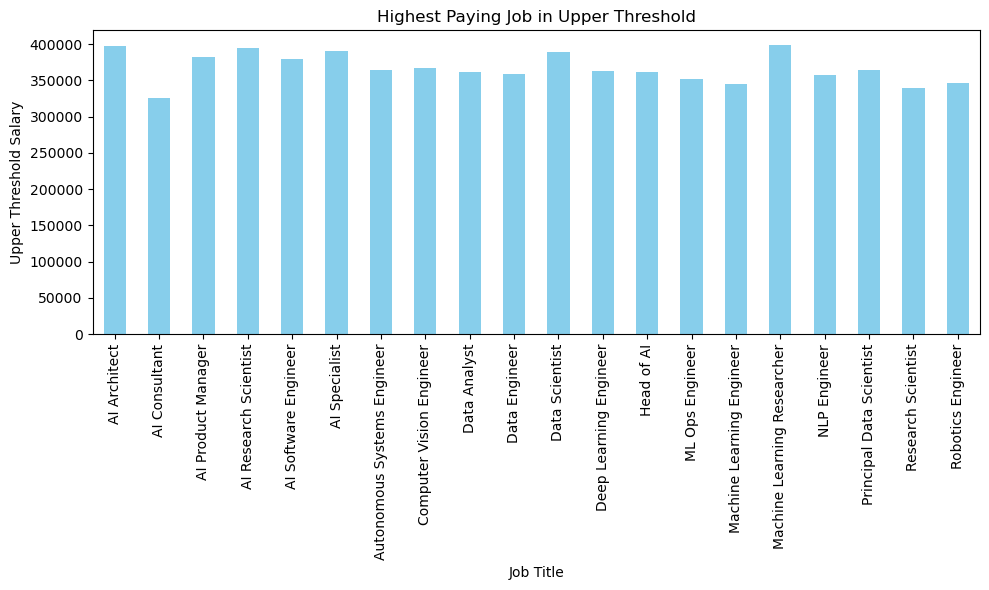

In [204]:
plt.figure(figsize=(10,6))
highest_job.plot(kind='bar', color='skyblue')
plt.title("Highest Paying Job in Upper Threshold")
plt.xlabel('Job Title')
plt.ylabel('Upper Threshold Salary')
plt.tight_layout()
plt.show()

In [205]:
highest_average = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
highest_average

job_title
AI Specialist                  120570.758242
Machine Learning Engineer      118827.919689
Head of AI                     118542.968627
AI Research Scientist          117897.925926
AI Architect                   117436.513619
Robotics Engineer              116470.793149
Principal Data Scientist       116305.219346
Research Scientist             116066.502695
Data Engineer                  115970.720961
Data Scientist                 115819.008333
ML Ops Engineer                115431.335172
AI Product Manager             114680.909825
AI Software Engineer           114273.201531
Deep Learning Engineer         113725.632312
AI Consultant                  113671.870739
Computer Vision Engineer       113472.707182
NLP Engineer                   112670.937008
Machine Learning Researcher    112621.747525
Autonomous Systems Engineer    111396.557272
Data Analyst                   111321.180501
Name: salary_usd, dtype: float64

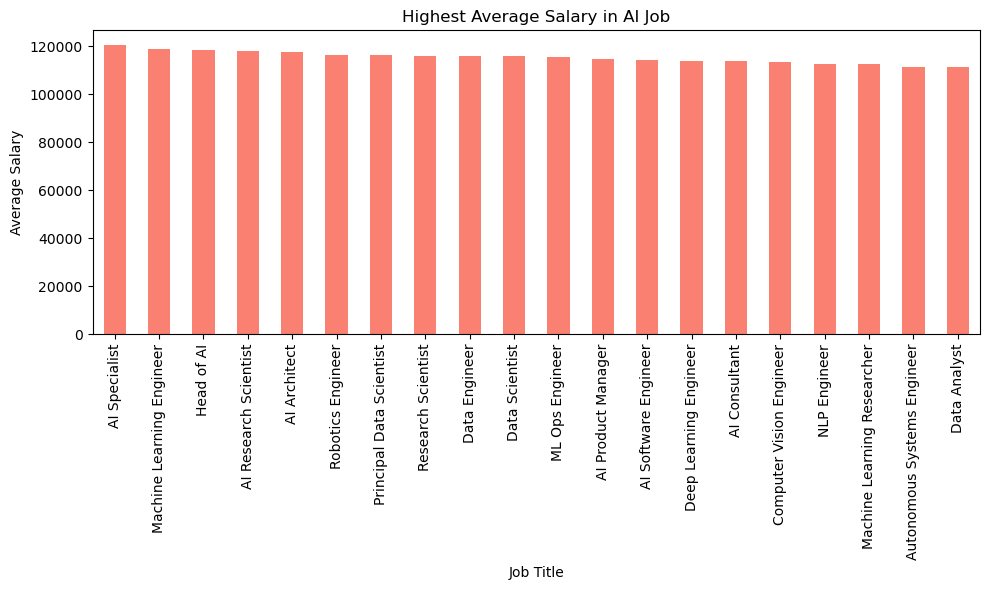

In [206]:
plt.figure(figsize=(10,6))
highest_average.plot(kind='bar', color='salmon')
plt.title('Highest Average Salary in AI Job')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

As we can see, Robotic Engineer has the lowest salary in maximum. But if we're talking about average, Data Analyst placed as the lowest paying job in average. This phenomenon may influence by other factors too, for example Education Level  

In [207]:
job_ed = df.groupby('education_required')['salary_usd'].mean().sort_values(ascending=False)
job_ed

education_required
Master       117171.815902
Bachelor     115861.629190
Associate    114605.708058
PhD          113728.165579
Name: salary_usd, dtype: float64

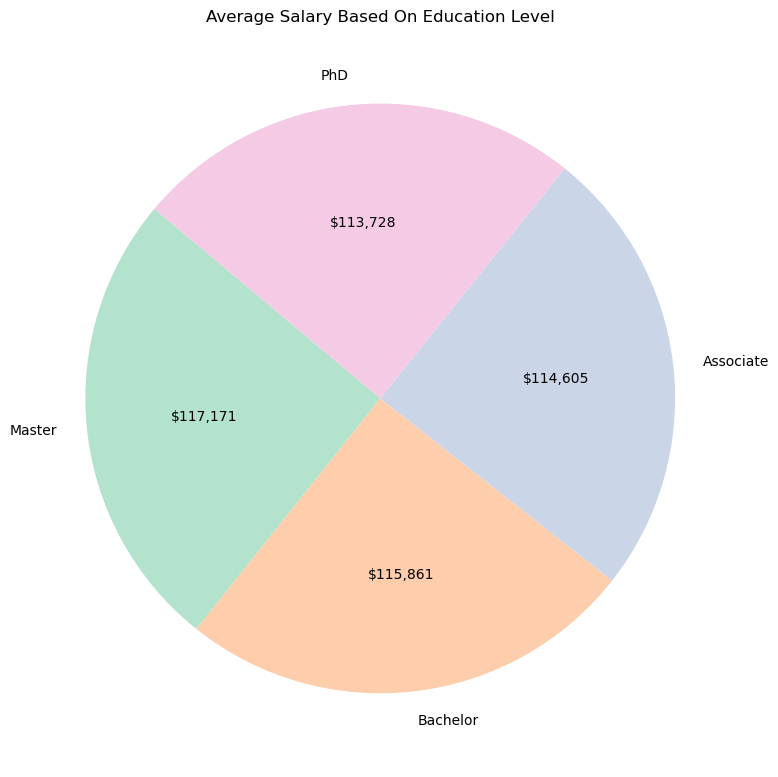

In [208]:
plt.figure(figsize=(8,8))
def edu(values):
    def level(pct):
        total = sum(values)
        val = int(pct*total/100)
        return f'${val:,}'
    return level
plt.pie(job_ed, labels=job_ed.index, autopct=edu(job_ed), startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Average Salary Based On Education Level')
plt.axis()
plt.tight_layout()
plt.show()

In [209]:
df['education_required'].unique()

array(['Bachelor', 'Master', 'Associate', 'PhD'], dtype=object)

In [210]:
bachelor = df[df['education_required'] == 'Bachelor']
educ = bachelor.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
print(f'Highest Average Paying Job for Bachelor Degree: ', educ)


Highest Average Paying Job for Bachelor Degree:  job_title
Machine Learning Engineer      125437.483333
Data Scientist                 125375.261780
AI Specialist                  123821.613095
Head of AI                     122473.897059
Computer Vision Engineer       119234.794444
Robotics Engineer              117914.515625
Data Engineer                  117622.169154
AI Software Engineer           116223.937799
AI Consultant                  115968.837349
AI Architect                   115310.400000
ML Ops Engineer                114524.030769
NLP Engineer                   114307.335079
Deep Learning Engineer         114262.010256
Principal Data Scientist       114005.779661
Machine Learning Researcher    113091.000000
Autonomous Systems Engineer    112487.259669
AI Product Manager             112194.284946
Research Scientist             108326.567708
Data Analyst                   108122.355769
AI Research Scientist          108036.860215
Name: salary_usd, dtype: float64


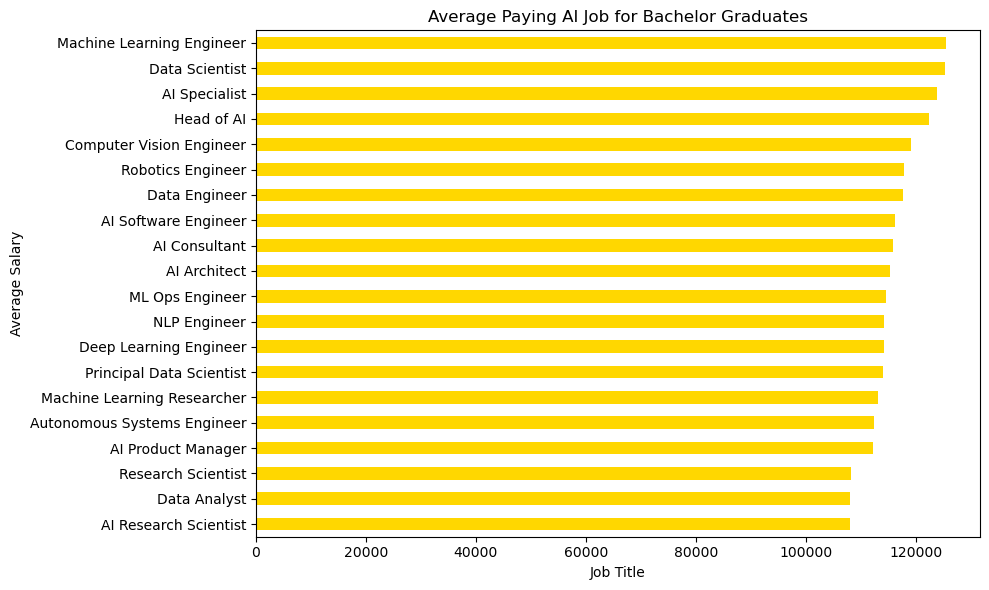

In [211]:
plt.figure(figsize=(10,6))
sort = educ.sort_values(ascending=True)
sort.plot(kind='barh', color='gold')
plt.title("Average Paying AI Job for Bachelor Graduates")
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

In [212]:
master = df[df['education_required'] == 'Master']
ma = master.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
print(f'Highest Average Paying Job for Master Degree: ', ma)

Highest Average Paying Job for Master Degree:  job_title
AI Research Scientist          124687.869347
Head of AI                     123964.176471
AI Architect                   121636.565000
Machine Learning Engineer      121463.698324
Robotics Engineer              120974.073892
Data Analyst                   118279.217822
AI Product Manager             117755.373684
Research Scientist             117591.208092
Principal Data Scientist       117312.454545
Data Engineer                  117093.831461
ML Ops Engineer                117023.697297
AI Software Engineer           116759.529730
AI Specialist                  116429.424870
Machine Learning Researcher    115586.707071
Data Scientist                 115564.885870
NLP Engineer                   114165.584906
Deep Learning Engineer         114061.785714
Computer Vision Engineer       113779.270718
AI Consultant                  111253.523529
Autonomous Systems Engineer    106466.578378
Name: salary_usd, dtype: float64


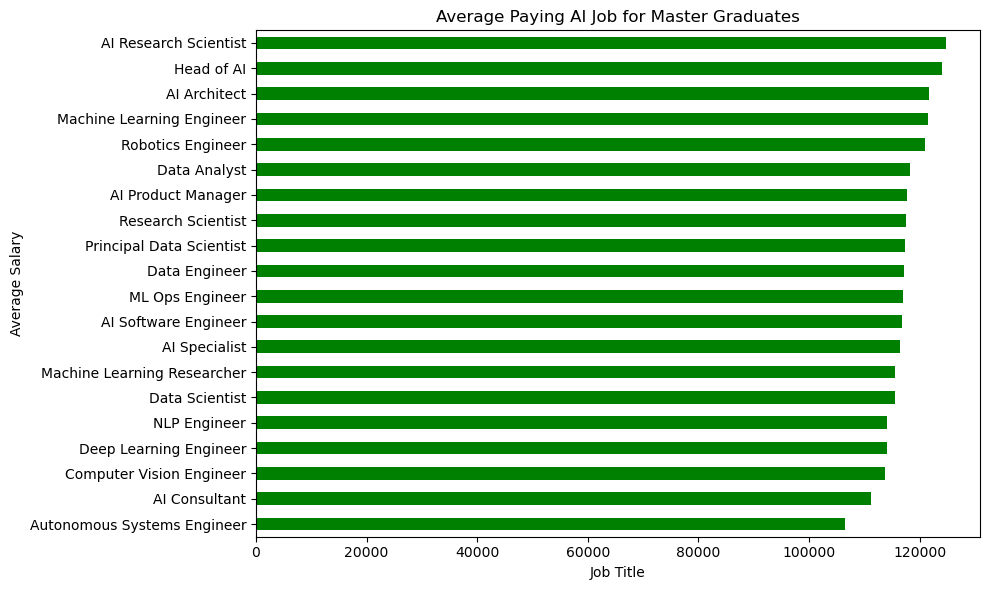

In [213]:
plt.figure(figsize=(10,6))
sort_ma = ma.sort_values(ascending=True)
sort_ma.plot(kind='barh', color='green')
plt.title("Average Paying AI Job for Master Graduates")
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

Master graduate has earn higher income compared to those who graduated from PhD despite their education level

## B. Are Remote Workers Has Higher Income?

In [214]:
remote = df.groupby('remote_ratio')['salary_usd'].mean().sort_values(ascending=False)
remote

remote_ratio
100    116160.545935
50     115776.806793
0      114140.231133
Name: salary_usd, dtype: float64

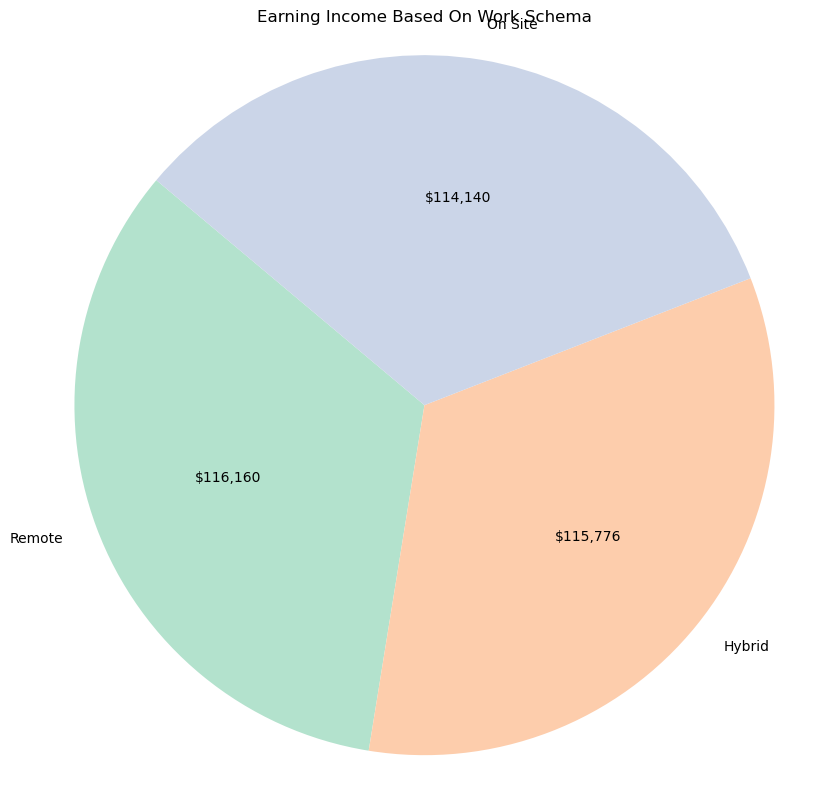

In [215]:
plt.figure(figsize=(8,8))
def coba(values):
    def pct(b):
        total =sum(values)
        val = int(b*total/100)
        return f'${val:,}'
    return pct
remote.index = ['Remote', 'Hybrid', 'On Site']
plt.pie(remote, labels=remote.index, startangle=140, autopct=coba(remote), colors=plt.cm.Pastel2.colors)
plt.title('Earning Income Based On Work Schema')
plt.tight_layout()
plt.axis('equal')
plt.show()

Remote workers earn more compared to two others work schema

## C. Does Company Size Has Influence on Employee Income?

In [216]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [217]:
com_size = df.groupby(['company_size','remote_ratio']).size().reset_index(name='count')
com_size

,company_size,remote_ratio,count
0,L,0,1680
1,L,50,1693
2,L,100,1625
3,M,0,1695
4,M,50,1620
5,M,100,1680
6,S,0,1700
7,S,50,1692
8,S,100,1615


In [218]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [219]:
com_inc = df.groupby('company_size')['salary_usd'].mean()
com_inc

company_size
L    130322.451781
M    113600.237037
S    102146.930098
Name: salary_usd, dtype: float64

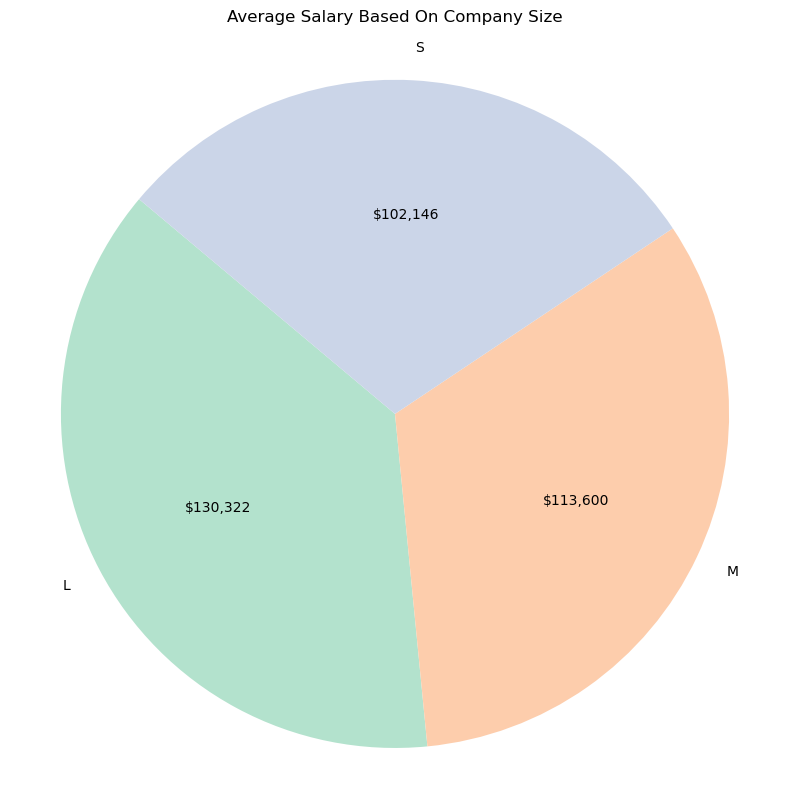

In [220]:
plt.figure(figsize=(8,8))

def salary(values):
    def com (pct):
        total = sum(values)
        val = int(pct*total/100)
        return f'${val:,}'
    return com

plt.pie(com_inc, labels=com_inc.index, autopct=salary(com_inc), startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Average Salary Based On Company Size', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## D. What is The Highest Demand Skill for Each Role? 

In [221]:
df.head(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"[Deep Learning, AWS, Mathematics, Python, Docker]",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"[Scala, SQL, Linux, Python]",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"[MLOps, Java, Tableau, Python]",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [222]:
df_exploded = df.explode('required_skills')

In [223]:
skill = df_exploded.groupby(['job_title', 'required_skills']).size().reset_index(name='count')
skill

,job_title,required_skills,count
0,AI Architect,AWS,92
1,AI Architect,Azure,93
2,AI Architect,Computer Vision,110
3,AI Architect,Data Visualization,120
4,AI Architect,Deep Learning,100
...,...,...,...
475,Robotics Engineer,Scala,141
476,Robotics Engineer,Spark,123
477,Robotics Engineer,Statistics,90
478,Robotics Engineer,Tableau,107


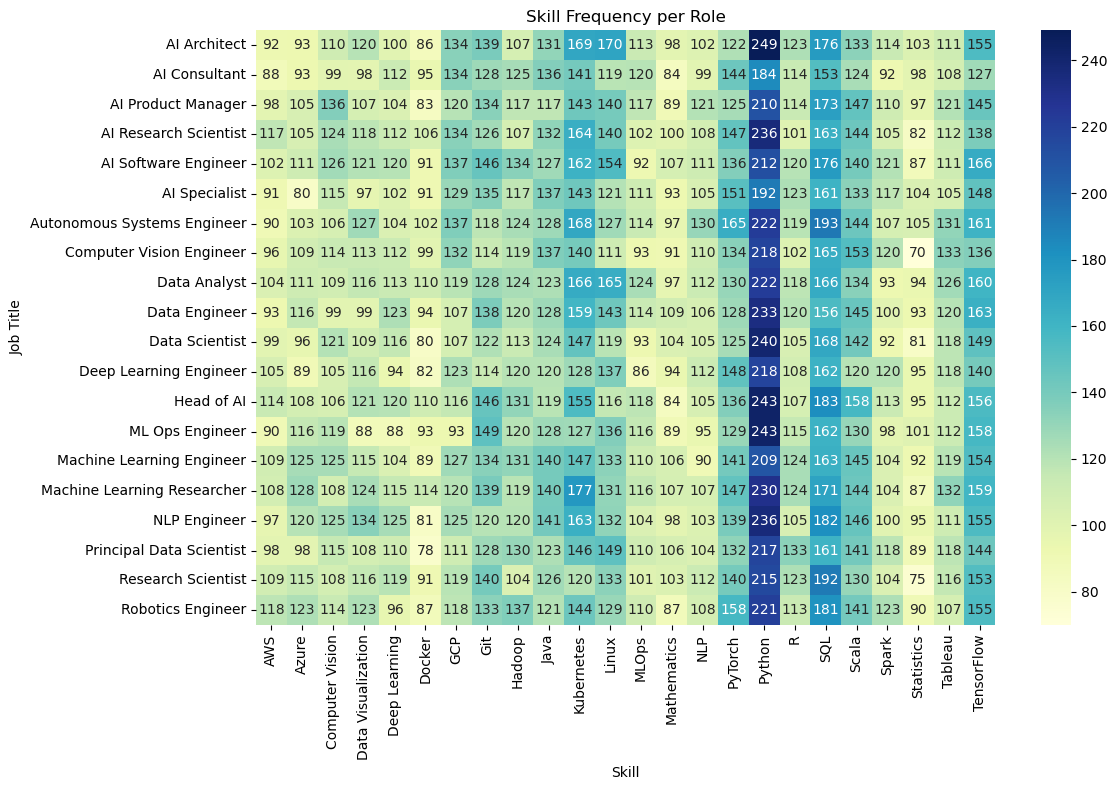

In [224]:
pivot_table = skill.pivot_table(index='job_title', columns='required_skills', values='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Skill Frequency per Role")
plt.xlabel("Skill")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

## F. What Industry Has Highest Potential Income in Average?

In [225]:
df.head(3)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"[Deep Learning, AWS, Mathematics, Python, Docker]",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech


In [226]:
industry = df.groupby(['industry'])['salary_usd'].mean().sort_values(ascending=False)
industry

industry
Consulting            117602.142157
Manufacturing         116162.888773
Media                 116127.730144
Education             116026.803347
Real Estate           115919.095333
Technology            115831.823937
Government            115694.321643
Finance               115323.398374
Telecommunications    115291.411234
Energy                115188.436475
Transportation        114837.802407
Retail                114776.363123
Healthcare            114433.883651
Automotive            113987.241176
Gaming                112979.574974
Name: salary_usd, dtype: float64

## G. How Long Do You Need To Increase Your Salary Above Average for Every Job Role?

In [227]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [228]:
avg_salary = df.groupby('job_title')['salary_usd'].mean().reset_index()
avg_salary.rename(columns={'salary_usd':'avg_salary'}, inplace=True)

df  = pd.merge(df, avg_salary, on='job_title')

df_above_avg = df[df['salary_usd'] > df['avg_salary']]

median_years = df_above_avg.groupby('job_title')['years_experience'].median().reset_index()
median_years.rename(columns={'years_experience': 'years_needed_to_exceed_avg_salary'}, inplace=True)
final_result = pd.merge(avg_salary, median_years, on='job_title')
final_result = final_result.sort_values(by='avg_salary', ascending=False).reset_index(drop=True)

final_result

,job_title,avg_salary,years_needed_to_exceed_avg_salary
0,AI Specialist,120570.758242,11.0
1,Machine Learning Engineer,118827.919689,12.0
2,Head of AI,118542.968627,12.0
3,AI Research Scientist,117897.925926,12.0
4,AI Architect,117436.513619,11.0
5,Robotics Engineer,116470.793149,11.0
6,Principal Data Scientist,116305.219346,11.0
7,Research Scientist,116066.502695,11.0
8,Data Engineer,115970.720961,10.5
9,Data Scientist,115819.008333,11.0
